<a href="https://colab.research.google.com/github/huskeypm/tutorials/blob/master/umap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP tutorial for unsupervised ML

## Installations and loading libraries

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.9 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Generating data with gaussian distributed random values

(array([ 22., 223., 224.,  31.,   0.,   0.,  13., 173., 259.,  55.]),
 array([-1.65334547, -0.84417999, -0.0350145 ,  0.77415098,  1.58331646,
         2.39248194,  3.20164742,  4.0108129 ,  4.81997838,  5.62914386,
         6.43830934]),
 <BarContainer object of 10 artists>)

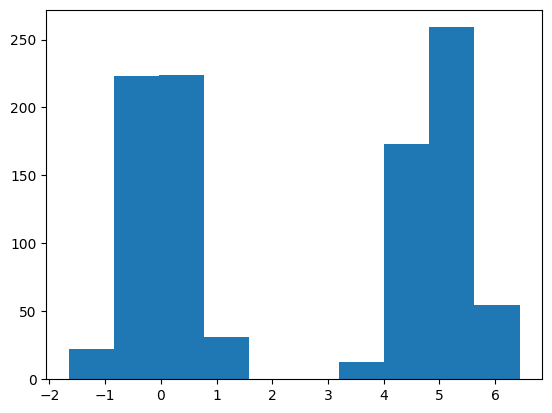

In [12]:
nDataPoints = 1000
nDataPointsHalf = int(nDataPoints/2)
# two distributions that differ by mean
sigma=1.
xs1 = np.random.randn( nDataPointsHalf)/(2*sigma**2)
xs2 = 5 + np.random.randn(nDataPointsHalf)/(2*sigma**2)
xs = np.concatenate([xs1,xs2])

# y component
sigma=0.5
ys = np.random.randn(nDataPoints)/(2*sigma**2)


plt.hist(xs)


## Create dataframe.
This is a little bit of extra work, but well worth it since we can do lots of custom/fun things with these objects

In [15]:
df = pd.DataFrame(xs, columns=['x'])
df['y']  = ys

df.to_csv('mydata.csv')


reading csv file so we have a template for your own tinkering around

In [17]:
df = pd.read_csv('mydata.csv')

## Create UMAP embedding with the data

In [18]:
import umap
reducer = umap.UMAP()


In [19]:
# Extract numerical features
features = df[['x', 'y']].to_numpy()

In [20]:
embedding = reducer.fit_transform( features )

Recall that we set the first half of the points to $\mu=0$, whereas second half has $\mu = 5$

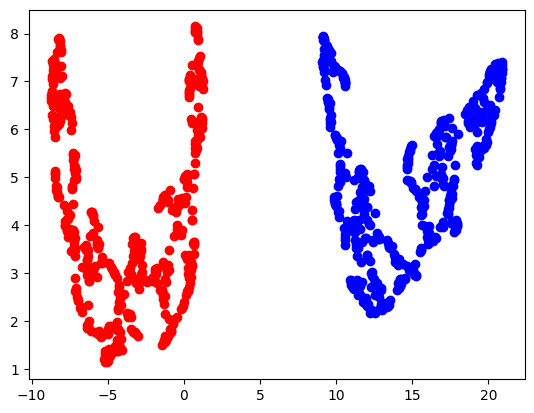

In [24]:
plt.scatter( embedding[0:nDataPointsHalf,0],embedding[0:nDataPointsHalf,1],facecolor='b' )
plt.scatter( embedding[nDataPointsHalf:-1,0],embedding[nDataPointsHalf:-1,1],facecolor='r' )


array([[ 0],
       [ 1],
       [ 2],
       [ 4],
       [ 8],
       [11],
       [12],
       [19],
       [24],
       [25],
       [26],
       [27],
       [34],
       [35],
       [37],
       [39]])

## More complex example
Last example just had two degrees of freedom (DOFs), so UMAP was overkill when compared to standard techniques like principal component analysis. Here we add several more DOFs.

In [26]:
# two distributions that differ by mean
sigma=0.5
zs1 = np.random.randn( nDataPointsHalf)/(2*sigma**2)
zs2 = 3 + np.random.randn(nDataPointsHalf)/(2*sigma**2)
zs = np.concatenate([zs1,zs2])
df['z']=zs

# addl components

sigma=0.5
js = np.random.randn(nDataPoints)/(2*sigma**2)
df['j'] = js

In [30]:
features = df.to_numpy()
embedding = reducer.fit_transform( features )
print(np.shape(features))

(1000, 5)


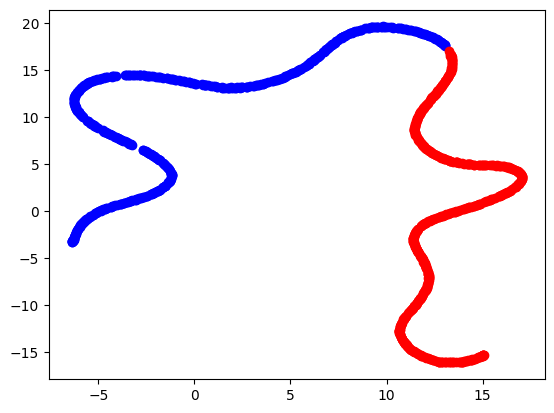

In [29]:
plt.scatter( embedding[0:nDataPointsHalf,0],embedding[0:nDataPointsHalf,1],facecolor='b' )
plt.scatter( embedding[nDataPointsHalf:-1,0],embedding[nDataPointsHalf:-1,1],facecolor='r' )


In [ ]:
## Got

## Got data?
Try your own dataset (csv?)